<a href="https://colab.research.google.com/github/jackiezeng01/MachineLearning_Fall2021/blob/main/Assignment_02b_Companion_2021f.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Machine Learning: Module 1 (Fall 2021)


# Assignment 02b Companion Notebook (second notebook)

This notebook contains some exercises to walk you through implementing the linear regression algorithm.  We'll pay special attention to debugging and visualization as we go along.

## A Toy Linear Regression Problem Revisited

As we discovered in the last assignment, the idea of a toy problem is very useful for validating that a machine learning algorithm is working as it is intended to.  Recall the following basic setup and role for a toy problem:

> Suppose you are given a learning algorithm designed to estimate some model parameters $\textbf{w}$ from some training data.
>
> 1.  Generate values for the model parameters $\mathbf{w}$ (e.g., set them to some known values or generate them randomly).  If you were applying your algorithm to real data, you would of course not know these parameters, but instead estimate them from data.  For our toy problem we'll proceed with values that we generate so we can test our algorithm more easily.
>
> 2.  Generate some training input data, $\mathbf{X}$, (random numbers work well for this).  Generate the training output data, $\mathbf{y}$, by applying the model with parameters $\mathbf{w}$.  For example, in a linear regression problem since $\mathbf{w}$ represents the regression coefficients, then we can generate each training label, $y_i$ as $y_i = \mathbf{x_i}^\top \mathbf{w}$.
>
> 3.  Run your learning algorithm on the synthesized training data $\mathbf{X}, \mathbf{y}$ to arrive at estimated values of the model parameters, $\hat{\mathbf{w}}$.
>
> 4.  Compare $\mathbf{w}$ and $\hat{\mathbf{w}}$ as a way of understanding whether your learning algorithm is working.

In the next code block, you'll see an example of a toy regression problem where we set $\mathbf{w} = \begin{bmatrix} 1 \\ 2 \end{bmatrix}$ and generate some training data.  To make the data a little more interesting, we'll add some noise to the training outputs (you saw this in the last assignment).  We'll also visualize the training data.

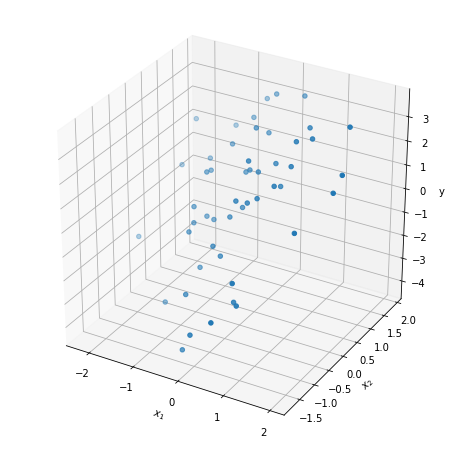

In [ ]:
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D 
import numpy as np
import matplotlib.pyplot as plt

# Generate some toy data
n_points = 50
X = np.random.randn(n_points,2) # Random data for x
w_true = np.array([1, 2]) #These are the "true" weights we're using to create our y values
# we'll apply a Gaussian noise with a standard deviation of 0.5 to the outputs to make it more interesting
y = X.dot(w_true) + np.random.randn(n_points,)*0.5

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('y')

plt.show()

### *Notebook Exercise 4 (30 minutes)*

Before implementing the algorithm you derived for computing $\mathbf{w}^\star$, let's create a visualization of the sum of squared errors as a function of the entries of $\mathbf{w}$. You should recall from exercises in the assignment document that the sum of squared errors for a particular value of $\mathbf{w}$ can be written as $\left(\mathbf{X}\mathbf{w} - \mathbf{y} \right)^\top \left (\mathbf{X}\mathbf{w} - \mathbf{y} \right)$

(a) Write a function called `sum_of_squared_errors` that takes the parameters `X`, `y`, and `w` and returns the sum of squared errors that this particular value of `w` incurs on the training data `X`, `y`.  We have included a skeletal outline of the function along with a unit test (SoftDes flashback!!).

(b) Run the visualization code in the cell below and interpret the resulting output.  What do the contour lines represent in the generated plot?  Based on the visualization, where is the optimal value of `w` (the one that minizes the squared error)?  Does this agree with the setup of the toy problem?  If not, why doesn't it match?

In [ ]:
def sum_of_squared_errors(X, y, w):
    """
    Return the sum of squared errors for the given training data (X, y) and
    model parameters w.

    >>> sum_of_squared_errors(np.array([[1, 4, 3],\
                                        [2, -1, 4]]),\
                              np.array([3, 4]),\
                              np.array([1, 2, 3]))
    289
    """
    e = X.dot(w)-y
    return e.dot(e)

import doctest
doctest.testmod()

TestResults(failed=0, attempted=1)

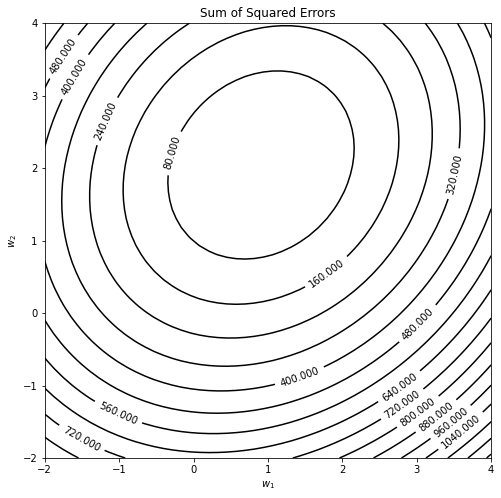

In [ ]:
w1 = np.linspace(-2, 4, 50) #Linearly spaced vector of size 50 ranging from -2 to 4
w2 = np.linspace(-2, 4, 50)

W1, W2 = np.meshgrid(w1, w2)
E = np.array([[sum_of_squared_errors(X, y, np.array([W1[i, j], W2[i, j]])) \
               for j in range(W1.shape[1])] \
              for i in range(W1.shape[0])])
fig, ax = plt.subplots(figsize=(8,8))
CS = ax.contour(W1, W2, E, colors='black', levels=20)
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Sum of Squared Errors')
plt.show()

#### *Expand for Solution*

In [ ]:
# ***Solution***
def sum_of_squared_errors(X, y, w):
    """
    Return the sum of squared errors for the given training data (X, y) and
    model parameters w.

    >>> sum_of_squared_errors(np.array([[1, 4, 3],\
                                        [2, -1, 4]]),\
                              np.array([3, 4]),\
                              np.array([1, 2, 3]))
    289
    """
    e = X.dot(w) - y
    return e.dot(e)

import doctest
doctest.testmod()

TestResults(failed=0, attempted=1)

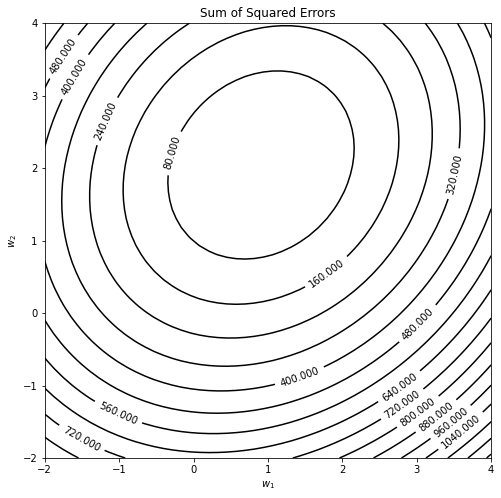

In [ ]:
# ***Solution***
w1 = np.linspace(-2, 4, 50)
w2 = np.linspace(-2, 4, 50)

W1, W2 = np.meshgrid(w1, w2)
E = np.array([[sum_of_squared_errors(X, y, np.array([W1[i, j], W2[i, j]])) \
               for j in range(W1.shape[1])] \
              for i in range(W1.shape[0])])
fig, ax = plt.subplots(figsize=(8,8))
CS = ax.contour(W1, W2, E, colors='black', levels=20)
ax.clabel(CS, inline=1, fontsize=10)
plt.xlabel('$w_1$')
plt.ylabel('$w_2$')
plt.title('Sum of Squared Errors')
plt.show()

***Solution***

(b) The contour lines represent values of $\mathbf{w}$ that incur equal squared error on the training set.  The optimal value of $\mathbf{w}$ (the one that minimizes the error) occurs near $w_1 = 1, w_2 = 2$, which is what we'd expect given the setup of the toy problem.

## Computing the Optimal Weights

Now you're ready to implement the formula that you derived in the main assignment document.  In that document you should have arrived at the following formula for the optimal weights:

$$\mathbf{w^\star} = \left ( \mathbf{X}^\top \mathbf{X} \right)^{-1} \mathbf{X}^\top \mathbf{y}$$

### Notebook Exercise 5 (20 minutes)

Fill in the body of the function `optimal_weights` below.  You've done the hard work to derive this beautiful expression, translating it to code is the last step to glory!  Hint: `np.linalg.inv` computes the inverse of a specified matrix.  We've included code that will run your code on the training data.  Does your code compute sensible values of $\mathbf{w}$ given the setup of the toy problem?

In [ ]:
def optimal_weights(X, y):
     """ Returns the optimal weights in the least squares sense for the specified
         training inputs (X) and training outputs (y) """
     result = np.linalg.inv(X.T.dot(X)).dot(X.T.dot(y))
     pass

optimal_weights(X, y)

#### Expand for Solution

In [ ]:
# ***Solution***

def optimal_weights(X, y):
     """ Returns the optimal weights in the least squares sense for the specified
         training inputs (X) and training outputs (y) """
     return np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

optimal_weights(X, y)

array([0.90621731, 2.04292028])

***Solution***

The output makes sense since it is close to the values used to generate the data, but not identical.  We don't expect it to be identical since we added noise to the training outputs.

## Sanity Checking your Implementation

On the first day we talked a lot about evaluating ML models.  For instance, we talked about running experiments to see how well they work for some problem.  When we are implementing the algorithm ourselves a different and more basic thing we'd like to evaluate is whether we've implemented the algorithm correctly. While you are probably feeling pretty confident right now that your implementation of linear regression is correct, for more complicated algorithms there have been cases when implementations of algorithms (even in published works) turned out to be incorrect (i.e., they didn't accurately reflect the algorithm that had been derived in the paper).



### *Notebook Exercise 6 (20 minutes)*

Let's check out a few strategies that we can use to verify that an implementation of an algorithm is correct. (Read through this to understand the concepts, but only dig into the details if it is helpful/interesting for you.)

a. ***Strategy 1 check for local optimality.***  If the machine learning algorithm involves optimizing some function (for example in linear regression you are optimizing squared error), you can verify that the solution you compute is locally optimal.  What does it mean for the solution to be locally optimal?  One very basic thing we can check is to see whether the value of the error gets strictly higher as we perturb the solution (e.g., add a small delta to the weights computed by your implementation of linear regression).  The following not very elegant, but illustrative code provides an implementation of this optimality check.

As a quick diagnostic of your understanding, what should be true of the output below in order for an implementation to pass the optimality check?  Why is it important to test each of the four perturbations below?

In [ ]:
w_star = optimal_weights(X, y)
w_star_err = sum_of_squared_errors(X, y, w_star)
perturbation = 10**-5
print(sum_of_squared_errors(X, y, w_star + np.array([perturbation, 0])) - w_star_err)
print(sum_of_squared_errors(X, y, w_star - np.array([perturbation, 0])) - w_star_err)
print(sum_of_squared_errors(X, y, w_star + np.array([0, perturbation])) - w_star_err)
print(sum_of_squared_errors(X, y, w_star - np.array([0, perturbation])) - w_star_err)

4.4259813591907005e-09
4.425986688261219e-09
4.1146570595174126e-09
4.1146570595174126e-09


b. ***Strategy 2: check the gradient.***  For many machine learning algorithms that involve optimizing some function (linear regression is a great example) a second sanity check is to verify that the gradient is 0 at a potential solution.  Since it is not necessarily straightforward to calculate the gradient of the function we are optimizing, we can instead check that a numerical approximation of the gradient is close to 0.  We will use the finite differences method to approximate the gradient.

To help you understand what we mean by finite differences, here is the definition of the derivative of a single variable function.

$$f'(x) = \lim_{h \rightarrow 0} \frac{f(x+h) - f(x)}{h}$$

This definition suggests that we can approximate the derivative using the finite difference method as $f'(x) \approx \frac{f(x+h) - f(x)}{h}$ for some small value of $h$.  What typically works even better is to use the method of central differences where we estimate the drivative as $f'(x) \approx \frac{f(x+h) - f(x - h)}{2h}$.

In the code below, we'll apply this idea to estimating the gradient (which consists of two partial derivatives) at the optimal solution returned by your implementation of linear regression.

As a quick check of your understanding, what should be true of the output below in order for an implementation to pass the gradient check?

In [ ]:
estimate_partial_w_1 = (sum_of_squared_errors(X, y, w_star + np.array([perturbation, 0])) - sum_of_squared_errors(X, y, w_star - np.array([perturbation, 0])))/(2*perturbation)
estimate_partial_w_2 = (sum_of_squared_errors(X, y, w_star + np.array([0, perturbation])) - sum_of_squared_errors(X, y, w_star - np.array([0, perturbation])))/(2*perturbation)
print(estimate_partial_w_1, estimate_partial_w_2)

-2.6645352591003757e-10 0.0


c. ***Strategy 3: compare to a known working implementation.***  Perhaps the most direct approach to validating your implementation would be to compare it to a known working implementation (assuming you have access to one).  In the cell below, we call `numpy`'s implementation of linear regression and compare it with your solution.

As a quick check of your understanding, what should be true of the output below in order for an implementation to pass the *compare to a known working implementation* check?

In [ ]:
w_known_working, _, _, _ = np.linalg.lstsq(X, y, rcond=-1)
print(w_known_working - w_star)

[-2.22044605e-16 -2.66453526e-15]


#### Expand for Solution

***Solution***
<ol type="a">
<li>In order to pass the test all of the differences printed out should be positive since this corresponds to the error increasing as we move away from the optimal solution we computed.  It's important to test all four direction since you want to look along each dimension and in both the positive and negative directions.</li>
<li>The gradient should be close to 0.</li>
<li>The difference between the two vectors should be small.</li>
</ol>

## Predicting Bikeshare Data (Machine Learning Application: Regression)

---



The University of California maintains a repository of machine learning datasets.  These datasets have been used over the years to benchmark algoirthms in order to faciltate comparisons to previously published work.  In this next section of the notebook you will be exploring the [Bikeshare dataset](https://archive.ics.uci.edu/ml/datasets/bike%20sharing%20dataset).  The Bikeshare dataset contains daily usage data over a roughly two year period.  Along with each record of user counts, there are independent variables that measure various characteristics of the day in question (e.g., whether it was a weekday or a weekend, the air temperature, the wind speed).

Here is what the data looks like (Note: we're using Pandas for this example.  We'll be learning some Pandas later in the course, but for now don't worry about it).


In [ ]:
import pandas as pd
bikeshare = pd.read_csv('https://raw.githubusercontent.com/kylecho/nd101_p1_neural_network/master/Bike-Sharing-Dataset/day.csv')
pd.DataFrame.head(bikeshare,10) #This just shows the first 10 values as to not dump all the data into your window. It is best practice to inspect all your data, often using plots

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
5,6,2011-01-06,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88,1518,1606
6,7,2011-01-07,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148,1362,1510
7,8,2011-01-08,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68,891,959
8,9,2011-01-09,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54,768,822
9,10,2011-01-10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41,1280,1321


In a moment, we'll perform regression with the column `cnt` (number of daily riders) as the output variable and `season`, `yr`, `mnth`, `holiday`, `weekday`, `workingday`, `weathersit`, `temp`, `atemp`, `hum`, `windspeed`, and a constant (bias) term as independent (explanatory variables).  

Why might we do this you ask?  One potential reason would be to predict when to purchase or move bikes to meet anticipated demand.


### *Notebook Exercise 7 (20 minutes)*
Before actually performing the regression, examine the hex plots below that show pairwise plots between each independent variable and the dependent variable (we avoided using scatter plots as those don't give a good sense of the density of the data when there are lots of overlapping points).

(a)  Before running the regression, make a prediction as to the sign of each of the coefficients for each of the explanatory variables.  That is will the corresponding weight for each of these 11 variables be positive, negative, or close to 0?

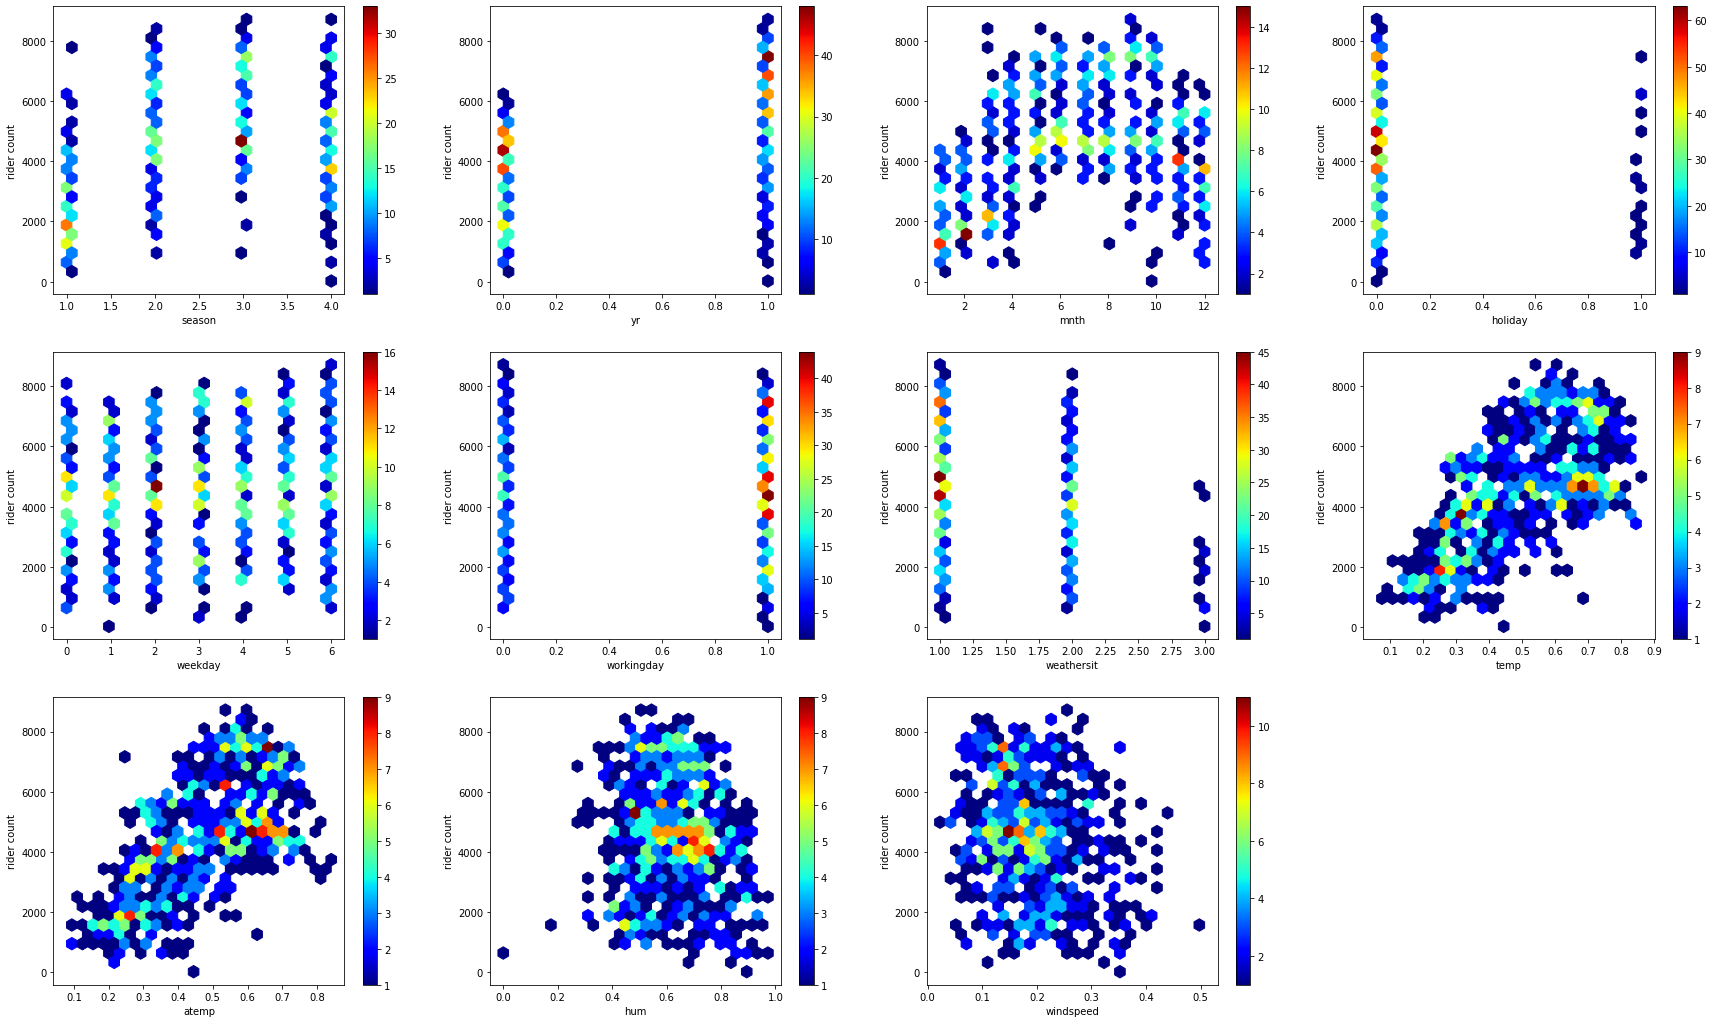

In [ ]:
X_bikeshare = bikeshare.drop(columns=['instant', 'dteday', 'cnt', 'registered', 'casual'])
y_bikeshare = bikeshare['cnt']

plt.figure(figsize=(30, 18))
for idx, col in enumerate(X_bikeshare):
    plt.subplot(3, 4, idx+1)
    plt.hexbin(X_bikeshare[col], y_bikeshare, gridsize=25, cmap='jet',mincnt=1)
    plt.colorbar()
    plt.xlabel(col)
    plt.ylabel('rider count')

plt.subplots_adjust(wspace=.2)
plt.show()

#### *Expand for Solution*

***Solution***

(a)  Based on what we estimate to be the linear trend in each scatter plot, we make the following predictions.
- season: positive
- yr: positive
- month: weakly positive (there is some downward movement at the end)
- weekday: close to 0
- workingday: positive
- holiday: negative
- weathersit: negative
- temp: positive
- atemp: positive
- hum: close to 0
- windspeed: weakly negative


### *Notebook Exercise 7 (part 2)*

Next, run the actual regression. The outputs from the code below are the weights for each of the corresponding features. 

(b) Do the results match your predictions?  If not, hazard a guess as to why they don't match (you won't necessarily be able to determine this given the information provided).

In [ ]:
def linear_regression(X, y):
    w, _, _, _ = np.linalg.lstsq(X, y, rcond=-1)
    return w


X_bikeshare['bias'] = 1
list(zip(linear_regression(X_bikeshare, y_bikeshare), X_bikeshare.columns))

[(509.77519828819163, 'season'),
 (2040.703401658309, 'yr'),
 (-38.97956441092032, 'mnth'),
 (-518.9919312460542, 'holiday'),
 (69.06221629898855, 'weekday'),
 (120.3569892130112, 'workingday'),
 (-610.9870081089631, 'weathersit'),
 (2028.9161034751414, 'temp'),
 (3573.2742884028476, 'atemp'),
 (-1018.8615712186543, 'hum'),
 (-2557.5691378686097, 'windspeed'),
 (1469.0030645879062, 'bias')]

#### *Expand for Solution*

***Solution***

(b) They mostly match.  Here are some more observations.
- Windspeed appeared to have a bigger influence (in the negative direction) than we intitially thought.
- `holiday` was hard to estimate mostly due to the visualization of the data as a hexplot (there isn't a lot of data in the `holiday = 1` part of the graph and thus it gets washed out in the plot.  Using a different plot like a [box plot](https://en.wikipedia.org/wiki/Box_plot) could be better for this.
- `mnth` was a surprise.  This looks like a few outliers at the end of the graph (`mnth` = 12) caused the weight to shift down and become negative.

It's also important to keep in mind that just because a variable is positively correlated with the output, does not imply that the OLS weight is positive.  There are situations that arise when the independent variables are correlated with each other when this would not be the case.  We'll be diving more into this in the next class/assignment.